# Линейная регрессия с нуля

## Содержание

1. Регрессия с одним параметром на сгенерированных данных
2. Регрессия со всеми параметрами на boston.csv

## 1. Регрессия с одним параметром на сгенерированных данных

### Предобработка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [3]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [4]:
X = np.random.gumbel(50, 10, 1000).reshape(-1,1) # генерируем фичи
y = X * 70000 # генерируем таргет данные
y = y + np.random.normal(0, 800000, (1000, 1)) # добавляем шум

In [5]:
TRAIN_TEST_RATIO = 0.8 # доля экземпляров в тренировочном датасете по отношению к количеству всех экземпляров в исходном датасете

In [6]:
train_number = round(X.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = X[:train_number] # избегание ошибки с одномерным массивом
y_train = y[:train_number]

X_test = X[train_number:] # избегание ошибки с одномерным массивом
y_test = y[train_number:]

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (800, 1)
y_train.shape: (800, 1)
X_test.shape: (200, 1)
y_test.shape: (200, 1)


### Визуализация данных

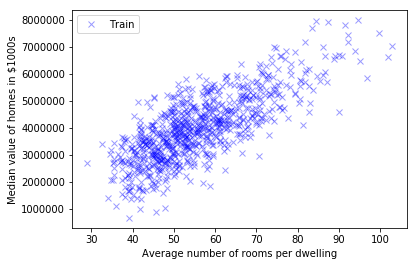

In [7]:
plt.plot(X_train, y_train, 'bx', label="Train", alpha=0.4) # тренировочные данные крестиками
plt.xlabel("Average number of rooms per dwelling") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

### Создание и тренировка модели

In [8]:
class LinearRegression:
    
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
    
    
    def mse(self, y_pred, y):
        return np.sum(np.square(y_pred - y)) / y.shape[0]
    
    
    def loss_gradient_w(self, y_pred, y, X):
        return 2 * np.sum((y_pred - y) * X) / y.shape[0]
    
    
    def loss_gradient_b(self, y_pred, y):
        return 2 * np.sum(y_pred - y) / y.shape[0]
    
    
    def fit(self, X, y):
        self.w = 0
        self.b = 0
        for i in range(self.epochs):
            print("Iteration: {}/{}".format(i + 1, self.epochs))
            print(self.w)
            y_pred = self.predict(X)
            self.w = self.w - self.lr * self.loss_gradient_w(y_pred, y, X)
            self.b = self.b - self.lr * self.loss_gradient_b(y_pred, y)
            print("MSE: {}".format(self.mse(y_pred, y)))
    
    
    def predict(self, X):
        return self.w * X + self.b

### Оценка модели

In [9]:
X_train.shape

(800, 1)

In [245]:
model = LinearRegression(10e-5, 20)
model.fit(X_train, y_train)

Iteration: 1/20
0
MSE: 17373558057144.033
Iteration: 2/20
46854.55743553088
MSE: 2613120647485.53
Iteration: 3/20
62987.14125759844
MSE: 863264031094.1086
Iteration: 4/20
68541.79413980889
MSE: 655817708290.1508
Iteration: 5/20
70454.34302246457
MSE: 631224830045.7585
Iteration: 6/20
71112.87336215831
MSE: 628309311144.0006
Iteration: 7/20
71339.63060951569
MSE: 627963653090.4746
Iteration: 8/20
71417.72338579982
MSE: 627922653214.3113
Iteration: 9/20
71444.62926461422
MSE: 627917770704.6025
Iteration: 10/20
71453.91090227517
MSE: 627917169925.6012
Iteration: 11/20
71457.12430964097
MSE: 627917076748.1536
Iteration: 12/20
71458.2483549424
MSE: 627917043747.5253
Iteration: 13/20
71458.65300854314
MSE: 627917017881.3097
Iteration: 14/20
71458.80996708864
MSE: 627916992861.3052
Iteration: 15/20
71458.88164119107
MSE: 627916967942.0426
Iteration: 16/20
71458.92395070309
MSE: 627916943035.1465
Iteration: 17/20
71458.95614947694
MSE: 627916918130.1396
Iteration: 18/20
71458.98486683672
MSE: 

### Визуализация работы модели

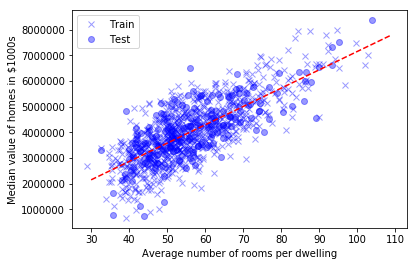

In [248]:
plt.plot(X_train, y_train, 'bx', label='Train', alpha=0.4) # тренировочные данные крестиками
plt.plot(X_test, y_test, 'bo', label='Test', alpha=0.4) # тестовые данные кружочками

# параметр model.coef_ - веса модели (W)
# параметр model.intercept_ - свободный параметр модели (b)
xx = np.arange(30, 110).reshape(-1, 1) # числовой ряд
plt.plot(xx, model.predict(xx), 'r--') # график предсказаний модели
plt.xlabel("Average number of rooms per dwelling") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

## 2. Регрессия со всеми параметрами на boston.csv

### Предобработка данных

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [231]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [232]:
DATA_DIR = "data" # путь к данным

In [233]:
df_boston = pd.read_csv(os.path.join(DATA_DIR, 'boston.csv'), index_col='ID') # прочитать данные из CSV и указать колонку с индексом
df_boston = df_boston.sample(frac=1, random_state=42) # перемешиваем данные на всякий случай
df_boston = df_boston.reset_index(drop=True) # сбросить индексы для красоты

print("df_boston.shape: {}".format(df_boston.shape))
df_boston.head()

df_boston.shape: (333, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
1,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,19.6
2,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27,19.8
3,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,27.9
4,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62,23.9


In [234]:
TRAIN_TEST_RATIO = 0.8 # доля экземпляров в тренировочном датасете по отношению к количеству всех экземпляров в исходном датасете

In [235]:
train_number = round(df_boston.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = df_boston.drop(['medv'], axis=1).iloc[:train_number].values
y_train = df_boston['medv'].iloc[:train_number].values

X_test = df_boston.drop(['medv'], axis=1).iloc[train_number:].values
y_test = df_boston['medv'].iloc[train_number:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (266, 13)
y_train.shape: (266,)
X_test.shape: (67, 13)
y_test.shape: (67,)


### Создание и тренировка модели

In [236]:
########################################## TODO ########################################################

### Оценка модели

In [20]:
########################################## TODO ########################################################